<a href="https://colab.research.google.com/github/YuruiNiu/AliciaNiu/blob/main/stock%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math
import pandas_datareader as  web
import numpy  as np
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from  keras.models import Sequential
from  keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock data
df = web.DataReader('AAPL',data_source='yahoo', start = '2012-01-02',  end = '2019-12-17')

In [16]:
from pandas.io.parsers.readers import read_csv
df =  read_csv('AAPL.csv').set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557467,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765112,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878096,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.956543,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.519096,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.688622,137310400


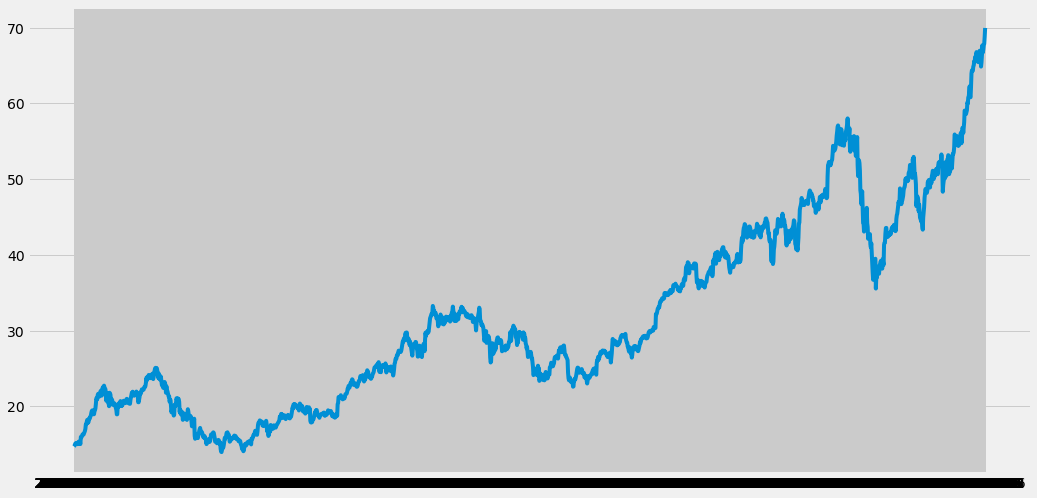

In [19]:
#visualize the price 
plt.figure(figsize  = (16,8))
plt.plot(df['Close'])
plt.show()

In [22]:
#create a new dataframe with only the close  column
data = df.filter(['Close'])
#convert the d ataframe to a numpy array
dataset = data.values
#split the dataset to train(80%)
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1602

In [23]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01319741],
       [0.0146064 ],
       [0.01753279],
       ...,
       [0.96251175],
       [0.97897982],
       [1.        ]])

In [33]:
#create the training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()
  

[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259])]
[0.13983513293775218]



In [34]:
#convert the  x-train and y-train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [39]:
x_train.shape

(1542, 60)

In [49]:
#shape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [52]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [54]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 48s 29ms/step - loss: 6.7791e-04


In [55]:
#create the testing dataset
#new arrary
test_data = scaled_data[training_data_len-60:,:]

#create the datasets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [56]:
#convert the data to a numpy array
x_test =  np.array(x_test)

In [58]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [62]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [63]:
#Get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.4921673217089845

In [64]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


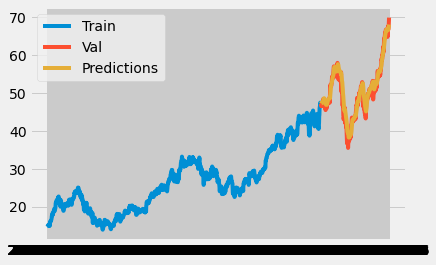

In [67]:
#visualize the data
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [68]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.300995
2018-05-17,46.747501,47.396049
2018-05-18,46.577499,47.416344
2018-05-21,46.907501,47.378738
2018-05-22,46.790001,47.369183
...,...,...
2019-12-10,67.120003,67.049072
2019-12-11,67.692497,67.247124
2019-12-12,67.864998,67.503883


In [72]:
pip install --upgrade pandas

In [73]:
pip install --upgrade pandas-datareader

In [78]:
#get the quote
df =  read_csv('AAPL.csv').set_index('Date')
#create a new dataframe
new_df = df.filter(['Close'])
#Get the last 60 day closing prices values and convert the dataframe to an array
last_60_days  = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test_data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price =  model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[68.663666]]
